In [1]:
#Import necessary modules

#Data manipulation/Graphing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

#Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


In [13]:
#import dataset, lines commented out no longer needed, mainly used for checking
dataset = pd.read_csv(r"C:\Users\Jason Lam\Downloads\dermatology_database_1.csv")

#Replace ? with NaN values
dataset = dataset.replace('?',np.nan)
dataset = dataset.dropna()

In [14]:
dataset

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [4]:
#Establish Variables
x = dataset.drop(['class'], axis = 1)
y = dataset['class']

In [5]:
#Split Training and Test Data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

In [6]:
#Linear Regression Model and its score
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
lin_pred = linear_regression.predict(x_test)
print('Score: '+str(linear_regression.score(x_train, y_train)))

Score: 0.8914244742403442


In [7]:
#Decision Tree and its statistics

decision_tree = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_test)
print('Score: '+str(decision_tree.score(x_train, y_train)))
print('Accuracy Score: '+str(accuracy_score(y_test , dt_pred)))
cm = confusion_matrix(y_test , dt_pred)
print('Confusion matrix\n\n', cm)

Score: 0.972
Accuracy Score: 0.8796296296296297
Confusion matrix

 [[30  1  0  0  0  0]
 [ 1 17  0  1  0  0]
 [ 0  0 17  1  0  0]
 [ 0  6  0 15  0  0]
 [ 1  0  0  0  9  0]
 [ 0  1  1  0  0  7]]


From the Confusion Matrix and the Accuracy Score above, we can tell that the Decision Tree is performing quite well when determining the correct classes. There are a few errors as indicated by the non-zero values outside of the leading diagonal of the matrix.

In [8]:
#Random Forest and its statistics

random_forest = RandomForestClassifier(random_state = 0 , max_depth = 5)
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)
print('Score: '+str(random_forest.score(x_train, y_train)))
print('Accuracy Score: '+str(accuracy_score(y_test , rf_pred)))
cm = confusion_matrix(y_test , rf_pred)
print('Confusion matrix\n\n', cm)

Score: 0.988
Accuracy Score: 0.9351851851851852
Confusion matrix

 [[31  0  0  0  0  0]
 [ 1 18  0  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  5  0 16  0  0]
 [ 0  0  0  0 10  0]
 [ 1  0  0  0  0  8]]


From the Confusion Matrix and the Accuracy Score above, we can tell that the Random Forest is performing quite well when determining the correct classes, even better than the Decision Tree. There are a few errors as indicated by the non-zero values outside of the leading diagonal of the matrix.

In [14]:
#SVM and its statistics

supp_vector_machine = svm.SVC()
supp_vector_machine.fit(x_train, y_train)
sv_pred = supp_vector_machine.predict(x_test)
print('Score: '+str(supp_vector_machine.score(x_train, y_train)))
print('Accuracy Score: '+str(accuracy_score(y_test , sv_pred)))
cm = confusion_matrix(y_test , sv_pred)
print('Confusion matrix\n\n', cm)

Score: 0.716
Accuracy Score: 0.6388888888888888
Confusion matrix

 [[31  0  0  0  0  0]
 [ 3 16  0  0  0  0]
 [ 0  0 18  0  0  0]
 [ 5 16  0  0  0  0]
 [ 7  2  0  0  1  0]
 [ 5  1  0  0  0  3]]


From the Confusion Matrix and the Accuracy Score above, we can see that the Support Vector Machine (SVM) is not performing as well in terms of predictions, as there are more non-zero values outside of the leading diagonal of the Confusion Matrix.

In [15]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
gnb_pred = gnb.predict(x_test)
print('Score: '+str(gnb.score(x_train, y_train)))
print('Accuracy Score: '+str(accuracy_score(y_test , gnb_pred)))
cm = confusion_matrix(y_test , gnb_pred)
print('Confusion matrix\n\n', cm)

Score: 0.904
Accuracy Score: 0.8518518518518519
Confusion matrix

 [[31  0  0  0  0  0]
 [ 0  4  0 12  3  0]
 [ 0  0 18  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  8]]


From the Confusion Matrix and the Accuracy Score above, we can see that the Gaussian Naive Bayes is performing quite well in terms of predictions, as there are less non-zero values outside of the leading diagonal of the Confusion Matrix, and the accuracy score is over 0.9.

In [12]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,0.173740,0.036039,0.071033,0.220784,-0.334604,0.025297,0.085688,-0.040812,0.214551,0.164601,0.023508,0.162065,0.172272,0.108256,-0.020583,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,0.187995,-0.080428,0.036771,0.273509,-0.371937,-0.106149,0.124884,0.033167,0.306889,0.326104,0.154432,0.323718,0.299116,0.179588,-0.090620,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,0.112793,0.305693,-0.142520,0.035561,-0.252761,-0.210341,0.213508,0.072985,0.368681,0.398286,0.226386,0.367492,0.248590,0.238679,0.285024,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,-0.139675,0.365353,0.100339,-0.137993,0.184312,0.213461,0.058731,-0.019349,-0.079079,-0.235030,-0.138078,-0.236290,-0.156881,-0.047784,0.369593,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,-0.093964,0.384412,-0.048038,-0.165916,-0.237857,0.141208,-0.038757,0.010014,-0.038782,0.017606,-0.152020,0.028212,-0.000663,0.160752,0.399235,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,-0.176255,0.911177,0.028623,-0.317031,-0.151269,0.380972,0.147099,-0.164093,-0.048675,-0.294115,-0.399858,-0.291233,-0.208546,-0.204090,0.884553,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,0.199582,-0.138781,-0.089868,-0.121734,0.027821,-0.010890,-0.098995,0.198391,-0.029260,-0.116229,-0.104694,-0.131709,-0.059200,-0.098317,-0.121232,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,-0.170058,0.870142,0.013077,-0.305885,-0.132867,0.360589,0.114945,-0.152957,-0.044011,-0.283775,-0.385800,-0.280994,-0.201214,-0.192845,0.885306,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,0.349222,-0.275952,-0.202487,0.333183,-0.229941,-0.532277,0.116932,0.239834,0.444443,0.725942,0.504374,0.643784,0.449353,0.516330,-0.271063,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,0.304867,-0.262591,-0.081709,0.358123,-0.222113,-0.535857,0.164273,0.202848,0.48

In [21]:
# Create a mask to ignore the diagonal (1.0 values)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # Upper triangle excluding diagonal
stacked_corr = corr.where(mask).stack().reset_index()  # Flatten and filter

# Rename columns for clarity
stacked_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Sort by absolute correlation (descending)
sorted_corr = stacked_corr.reindex(
    stacked_corr['Correlation'].abs().sort_values(ascending=False).index
)

# Get the top N highest correlations (e.g., top 10)
top_correlations = sorted_corr.head(10)
top_correlations

,Variable 1,Variable 2,Correlation
333,melanin_incontinence,vacuolisation_damage_basal_layer,0.942366
560,vacuolisation_damage_basal_layer,saw_tooth_appearance_retes,0.937678
564,vacuolisation_damage_basal_layer,band_like_infiltrate,0.937120
580,follicular_horn_plug,perifollicular_parakeratosis,0.928843
577,saw_tooth_appearance_retes,band_like_infiltrate,0.928171
339,melanin_incontinence,band_like_infiltrate,0.919119
180,polygonal_papules,vacuolisation_damage_basal_layer,0.911598
165,polygonal_papules,melanin_incontinence,0.911177
541,focal_hypergranulosis,vacuolisation_damage_basal_layer,0.910004
547,focal_hypergranulosis,band_like_infiltrate,0.906516


From the table above, we can see the variables that are the most closely correlated. Using this, it may be possible to make diagnosis of the conditions more efficient, as the existence of either variable would likely imply the existence of the other.

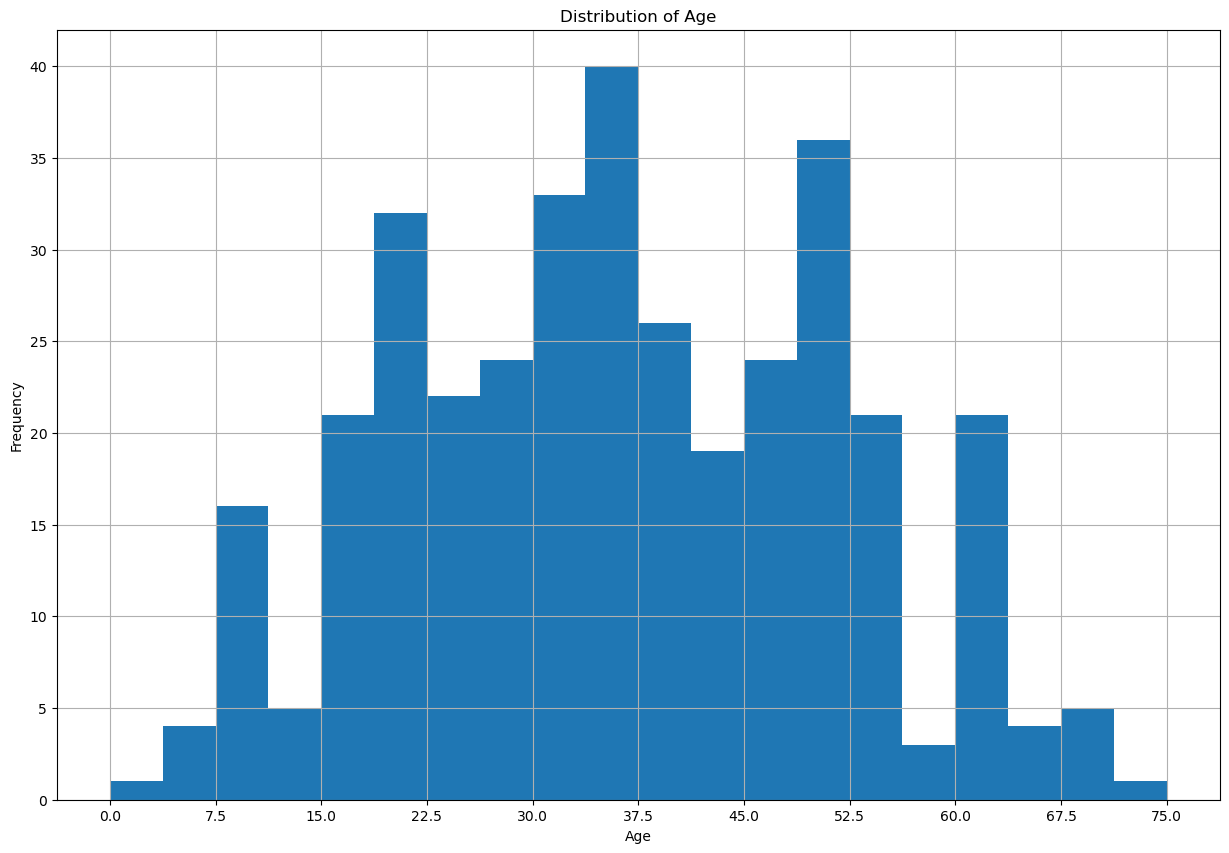

In [19]:
# Convert age column to numeric (silently)
dataset['age'] = pd.to_numeric(dataset['age'], errors='coerce')

# Drop NA values without printing
dataset = dataset.dropna(subset=['age']).copy()

# Create figure and plot without returning anything
plt.figure(figsize=(15, 10))
ax = dataset['age'].hist(bins=20)  # Using 20 bins directly is simpler

# Customize the plot
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Age')

# Ensure clean numeric x-axis
min_age = dataset['age'].min()
max_age = dataset['age'].max()
ax.set_xticks(np.linspace(min_age, max_age, 11))  # 10 nice intervals

plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

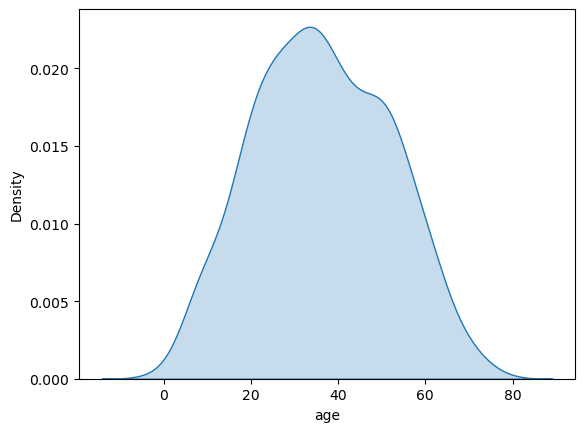

In [20]:
#Smoothing out the curves to see what our dataset actually looks like

import seaborn as sns  
sns.kdeplot(dataset['age'], fill=True)  